# Nanodegree Engenheiro de Machine Learning
## Projeto final
Arthur Pimenta 
28 de maio de 2019

# Exploração de Dados e Vizualização

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [192]:
# Dados de treino
df_train = pd.read_csv("input/train.csv")
print(df_train.shape)

(404290, 6)


In [193]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [195]:
from prettytable import PrettyTable
from textwrap import fill

x = PrettyTable()
x.field_names = df_train.columns
for i in range(5):
    x.add_row([df_train.iloc[i][0], df_train.iloc[i][1], df_train.iloc[i][2], fill(df_train.iloc[i][3], width=40), fill(df_train.iloc[i][4], width=40), df_train.iloc[i][5]])
print(x)

+----+------+------+------------------------------------------+------------------------------------------+--------------+
| id | qid1 | qid2 |                question1                 |                question2                 | is_duplicate |
+----+------+------+------------------------------------------+------------------------------------------+--------------+
| 0  |  1   |  2   | What is the step by step guide to invest | What is the step by step guide to invest |      0       |
|    |      |      |        in share market in india?         |             in share market?             |              |
| 1  |  3   |  4   |  What is the story of Kohinoor (Koh-i-   |     What would happen if the Indian      |      0       |
|    |      |      |              Noor) Diamond?              |  government stole the Kohinoor (Koh-i-   |              |
|    |      |      |                                          |           Noor) diamond back?            |              |
| 2  |  5   |  6   |    

In [196]:
# from prettytable import PrettyTable
# from textwrap import fill

# x = PrettyTable()
# x.field_names = df_train.columns
# for i in range(5):
#     x.add_row([df_train.iloc[i][0], df_train.iloc[i][1], df_train.iloc[i][2], fill(question_preprocessing(df_train.iloc[i][3]), width=40), fill(question_preprocessing(df_train.iloc[i][4]), width=40), df_train.iloc[i][5]])
# print(x)

In [197]:
# Dados faltantes
null_columns = df_train.columns[df_train.isnull().any()]
values = df_train[null_columns].isnull().sum()

for c, v in zip(null_columns, values):
    print('Coluna: {}, Valores faltantes: {}'.format(c, v))

Coluna: question1, Valores faltantes: 1
Coluna: question2, Valores faltantes: 2


In [198]:
df_train.fillna('', inplace=True)

In [199]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)


In [200]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)

print('Número de perguntas que aparecem mais de uma vez: {}'.format(np.sum(np.array(list(c.values())) > 1)))

print('Número de perguntas: {}'.format(len(c)))

Número de perguntas que aparecem mais de uma vez: 111780
Número de perguntas: 537933


In [201]:
111780/537933

0.20779539459375052

In [202]:
question_freq = list(c.values())
question_freq = np.array(question_freq)

In [203]:
qids = np.concatenate([df_train['qid1'].values, df_train['qid2'].values], axis=0)
qids.shape

(808580,)

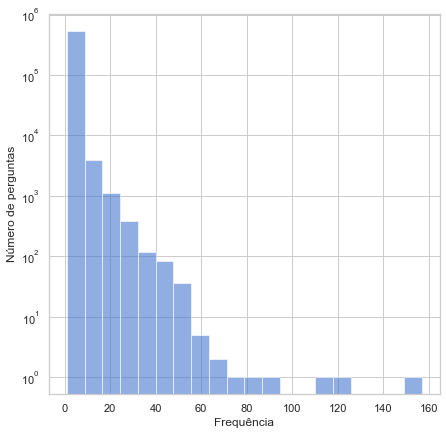

In [204]:
# bins = np.linspace(0, 20, 20)
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
ax.hist(question_freq, alpha=0.6, bins=20)
ax.set_xlabel('Frequência')
ax.set_ylabel('Número de perguntas')
plt.yscale('log', nonposy='clip')
plt.show()

In [205]:
# Percentual de pares duplicadas na base de dados
duplicate_group = df_train.groupby('is_duplicate')['id'].count()
print('Perguntas duplicadas {}'.format(duplicate_group))

Perguntas duplicadas is_duplicate
0    255027
1    149263
Name: id, dtype: int64


In [206]:
print('Percentual de pares duplicados: {:.4f}%'.format(duplicate_group[1] / (duplicate_group.sum())))

Percentual de pares duplicados: 0.3692%


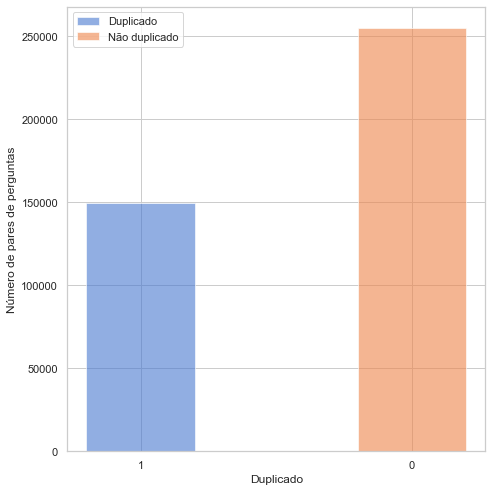

In [217]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# plt.style.context('seaborn')
ax.bar('1', duplicate_group[1], alpha=0.6, width=0.4, label='1')
ax.bar('0', duplicate_group[0], alpha=0.6, width=0.4, label='0')

# sns.barplot(['1'], duplicate_group[1])
# sns.barplot(['0'], duplicate_group[0])

ax.set_xlabel('Duplicado')
ax.set_ylabel('Número de pares de perguntas')
ax.legend(['Duplicado', 'Não duplicado'])
plt.tight_layout()

In [218]:
questions = pd.concat([df_train['question1'], df_train['question2']], axis=0)
questions.shape

(808580,)

In [219]:
df_train.drop(['id', 'qid1', 'qid2'], inplace=True, axis=1)

In [220]:
for i in range(5):
    print(df_train.iloc[i].question1)
    print(df_train.iloc[i].question2)
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?



In [221]:
from gensim.parsing.preprocessing import *
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words = ['what', 'which', 'who', 'whom', 'when', 'where', 'why', 'how']
for w in words:
    stop_words.remove(w)

def question_preprocessing(question):
    question = question.lower()
    question = strip_punctuation(question)
    question = strip_numeric(question)
    question = strip_non_alphanum(question)
    question = strip_multiple_whitespaces(question)
    question = [w for w in question.split() if not w in stop_words]
    question = " ".join(question)
    question = strip_short(question, minsize=3)
    question = stem_text(question)
    
    return question

In [222]:
for i in range(5):
    print(question_preprocessing(df_train.iloc[i].question1))
    print(question_preprocessing(df_train.iloc[i].question2))
    print()

what step step guid invest share market india
what step step guid invest share market

what stori kohinoor koh noor diamond
what would happen indian govern stole kohinoor koh noor diamond back

how increas speed internet connect us vpn
how internet speed increas hack dn

why mental lone how solv
find remaind when math math divid

which on dissolv water quikli sugar salt methan carbon oxid
which fish would surviv salt water



In [223]:
df_train.question1 = df_train.question1.map(lambda q: question_preprocessing(q))
df_train.question2 = df_train.question2.map(lambda q: question_preprocessing(q))
df_train.head()

,question1,question2,is_duplicate
0,what step step guid invest share market india,what step step guid invest share market,0
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0
2,how increas speed internet connect us vpn,how internet speed increas hack dn,0
3,why mental lone how solv,find remaind when math math divid,0
4,which on dissolv water quikli sugar salt metha...,which fish would surviv salt water,0


In [224]:
# df_is_duplicate = df_train[df_train['is_duplicate'] == 1]
# df_is_not_duplicate = df_train[df_train['is_duplicate'] == 0]

In [225]:
size = 10000
df_train_balanced = pd.concat([df_train[df_train['is_duplicate'] == 1][:size], df_train[df_train['is_duplicate'] == 0][:size]])
df_train_balanced.shape

(20000, 3)

In [226]:
questions = pd.Series(pd.concat([df_train_balanced.question1, df_train_balanced.question2], axis=0).unique())
questions.shape

(34982,)

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(questions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [228]:
from scipy.spatial import distance

df_train_balanced['dist'] = df_train_balanced.apply(lambda x: distance.sqeuclidean(vectorizer.transform([x.question1]).toarray(), vectorizer.transform([x.question2]).toarray()), axis=1)

In [229]:
def word_share(row):
    w1 = set(row['question1'].split(' '))
    w2 = set(row['question2'].split(' '))  
    return 2 * len(w1 & w2)/(len(w1) + len(w2))

df_train_balanced['word_share'] = df_train_balanced.apply(word_share, axis=1)

In [230]:
df_train_balanced['q1_words'] = df_train_balanced.apply(lambda row: len(row['question1'].split(' ')), axis=1)
df_train_balanced['q2_words'] = df_train_balanced.apply(lambda row: len(row['question2'].split(' ')), axis=1)

In [231]:
df_train_balanced['q1_len'] = df_train_balanced.apply(lambda row: len(row['question1']), axis=1)
df_train_balanced['q2_len'] = df_train_balanced.apply(lambda row: len(row['question2']), axis=1)

In [232]:
idf = vectorizer.idf_
features_weight = dict(zip(vectorizer.get_feature_names(), idf))

In [233]:
'i' in features_weight

False

In [234]:
idf = vectorizer.idf_
features_weight = dict(zip(vectorizer.get_feature_names(), idf))

def word_share_weight(row):
    w1 = row['question1'].split(' ')
    w2 = row['question2'].split(' ')
    all_words = w1 + w2
    n = []
    for w in set(w1) & set(w2):
        if(w in features_weight):
            n.append(features_weight[w])
    
    d = []
    for w in all_words:
        if(w in features_weight):
            d.append(features_weight[w])
            
#     print(n[:10])
    n = np.array(n)
    n = np.sum(n)
    d = np.array(d)
    d = np.sum(d)
    return 2* n/d

df_train_balanced['word_share_weight'] = df_train_balanced.apply(word_share_weight, axis=1)

In [235]:
df_train_balanced.shape

(20000, 10)

In [236]:
df_train_balanced[df_train_balanced['word_share_weight']==0].shape

(1115, 10)

In [237]:
df_train_balanced.head()

,question1,question2,is_duplicate,dist,word_share,q1_words,q2_words,q1_len,q2_len,word_share_weight
5,astrolog capricorn sun cap moon cap rise what sai,tripl capricorn sun moon ascend capricorn what...,1,1.055979,0.666667,9,8,49,50,0.503926
7,how good geologist,what great geologist,1,0.500691,0.333333,3,3,18,20,0.574795
11,how read find youtub comment,how see youtub comment,1,0.631466,0.666667,5,4,28,22,0.656878
12,what make physic easi learn,how make physic easi learn,1,0.061480,0.800000,5,5,27,26,0.916942
13,what first sexual experi like,what first sexual experi,1,0.137941,0.888889,5,4,29,24,0.904839


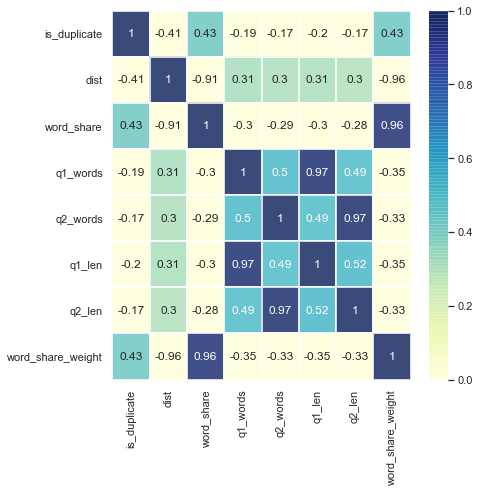

In [238]:
# Desenhe um mapa de calor com as correlações
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

sns.heatmap(df_train_balanced.drop(['question1', 'question2'], axis=1).corr(), annot=True, linewidths=1, ax=ax, cmap='YlGnBu',  vmin=0, vmax=1, alpha = 0.8)
plt.tight_layout()

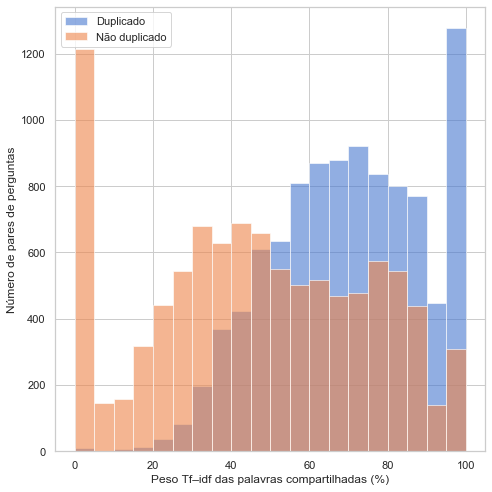

In [240]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# sns.despine(left=True)

# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values)
# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share_weight'].values * 100,  bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share_weight'].values * 100,  bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Peso Tf–idf das palavras compartilhadas (%)')
ax.legend(['Duplicado', 'Não duplicado'])

# plt.setp(ax, yticks=[])
plt.tight_layout()

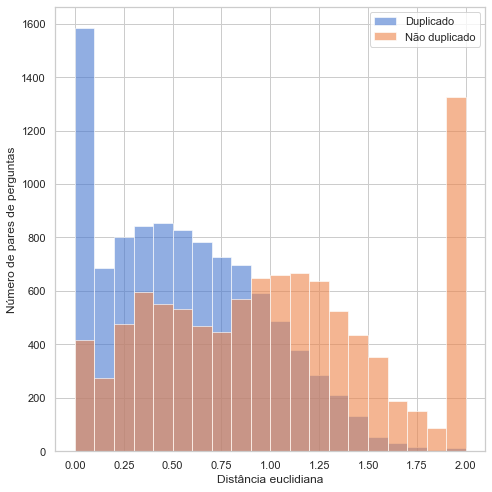

In [241]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

bins = np.linspace(0, 1, 10)

highest_dist = np.max(df_train_balanced['dist'])
highest_dist = 1

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['dist'].values/highest_dist, bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['dist'].values/highest_dist, bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Distância euclidiana')
ax.legend(['Duplicado', 'Não duplicado'])

plt.tight_layout()

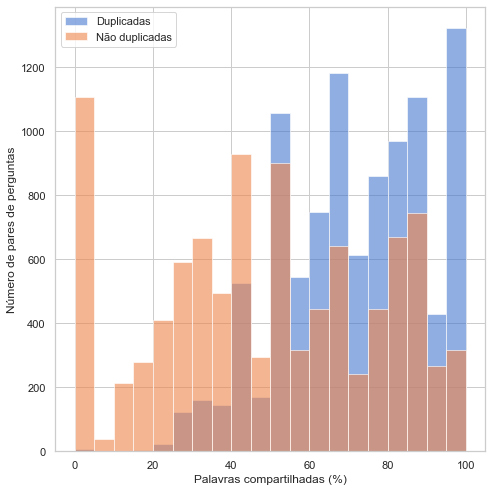

In [242]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# sns.despine(left=True)

# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values)
# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values *100,  bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values *100,  bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Palavras compartilhadas (%)')
ax.legend(['Duplicadas', 'Não duplicadas'])

# plt.setp(ax, yticks=[])
plt.tight_layout()

In [54]:
df_train.head()

,question1,question2,is_duplicate
0,what step step guid invest share market india,what step step guid invest share market,0
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0
2,how increas speed internet connect us vpn,how internet speed increas hack dn,0
3,why mental lone how solv,find remaind when math math divid,0
4,which on dissolv water quikli sugar salt metha...,which fish would surviv salt water,0


# Implementação do Modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("input/train.csv")
df_train.fillna('empty', inplace=True)
df_train.drop(['id', 'qid1', 'qid2'], inplace=True, axis=1)
print(df_train.shape)

(404290, 3)


## Reamostragem

In [3]:
# Class count, Divide by class
df_class_0 = df_train[df_train['is_duplicate'] == 0]
df_class_1 = df_train[df_train['is_duplicate'] == 1]

count_class_0 = df_class_0['is_duplicate'].count()
count_class_1 = df_class_1['is_duplicate'].count()

print(df_class_0.shape)
print(count_class_0)
print()
print(df_class_1.shape)
print(count_class_1)

(255027, 3)
255027

(149263, 3)
149263


In [4]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
print(df_class_1_over.shape)

(255027, 3)


In [5]:
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.shape)

Random over-sampling:
(510054, 3)


In [6]:
df_train_over.groupby('is_duplicate').count()

,question1,question2
is_duplicate,,
0,255027,255027
1,255027,255027


## Limpar dados

In [7]:
from gensim.parsing.preprocessing import *
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words = ['what', 'which', 'who', 'whom', 'when', 'where', 'why', 'how']
for w in words:
    stop_words.remove(w)

def question_preprocessing(question):
    question = question.lower()
    question = strip_punctuation(question)
    question = strip_numeric(question)
    question = strip_non_alphanum(question)
    question = strip_multiple_whitespaces(question)
    question = [w for w in question.split() if not w in stop_words]
    question = " ".join(question)
    question = strip_short(question, minsize=3)
    question = stem_text(question)
    
    return question

In [9]:
%%time
df_train_over['question1'] = df_train_over['question1'].map(lambda q: question_preprocessing(q))
df_train_over['question2'] = df_train_over['question2'].map(lambda q: question_preprocessing(q))

CPU times: user 1min 42s, sys: 999 ms, total: 1min 43s
Wall time: 1min 49s


In [11]:
df_train_over.head()

,question1,question2,is_duplicate
0,what step step guid invest share market india,what step step guid invest share market,0
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0
2,how increa speed internet connect vpn,how internet speed increa hack,0
3,why mental lone how solv,find remaind when math math divid,0
4,which dissolv water quikli sugar salt methan c...,which fish would surviv salt water,0


In [12]:
df_train_over.shape

(510054, 3)

## Vetorização

In [13]:
# Questions
questions_fit = pd.concat([df_train_over['question1'], df_train_over['question2']], axis=0)
questions_fit.shape

(1020108,)

In [14]:
# %%time
# questions_fit = questions_fit.map(lambda x: question_preprocessing(x))

In [15]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(questions_fit)

CPU times: user 11.7 s, sys: 326 ms, total: 12.1 s
Wall time: 12.5 s


## Feature Engeneering

### Distância

In [16]:
# from scipy.spatial import distance

# def euclidean_dist(q1, q2):
#      return distance.sqeuclidean(vectorizer.transform([q1]).toarray(), vectorizer.transform([q2]).toarray())

In [17]:
# %%time
# df_train_over['dist'] = df_train_over.apply(lambda x: euclidean_dist(x['question1'], x['question2']), axis=1)

### Número de palavras

In [18]:
%%time
df_train_over['q1_words'] = df_train_over.apply(lambda row: len(row['question1'].split(' ')), axis=1)
df_train_over['q2_words'] = df_train_over.apply(lambda row: len(row['question2'].split(' ')), axis=1)

CPU times: user 19.6 s, sys: 107 ms, total: 19.7 s
Wall time: 19.9 s


### Tamanho da pergunta

In [19]:
%%time
df_train_over['q1_len'] = df_train_over.apply(lambda row: len(row['question1']), axis=1)
df_train_over['q2_len'] = df_train_over.apply(lambda row: len(row['question2']), axis=1)

CPU times: user 19.7 s, sys: 138 ms, total: 19.8 s
Wall time: 20.2 s


### Compartilhamento de palavras

In [20]:
def word_share(row):
    w1 = set(row['question1'].split(' '))
    w2 = set(row['question2'].split(' '))  
    return 2 * len(w1 & w2)/(len(w1) + len(w2))

In [21]:
%%time
df_train_over['word_share'] = df_train_over.apply(word_share, axis=1)

CPU times: user 18.4 s, sys: 121 ms, total: 18.5 s
Wall time: 18.8 s


### Comartilhamento do peso das palavras

In [22]:
idf = vectorizer.idf_
features_weight = dict(zip(vectorizer.get_feature_names(), idf))

def word_share_weight(row):
    w1 = row['question1'].split(' ')
    w2 = row['question2'].split(' ')
    all_words = w1 + w2
    n = []
    for w in set(w1) & set(w2):
        if(w in features_weight):
            n.append(features_weight[w])
    
    d = []
    for w in all_words:
        if(w in features_weight):
            d.append(features_weight[w])
            
#     print(n[:10])
    n = np.array(n)
    n = np.sum(n)
    d = np.array(d)
    d = np.sum(d)
    return 2* n/d

In [23]:
%%time
df_train_over['word_share_weight'] = df_train_over.apply(word_share_weight, axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 33.5 s, sys: 129 ms, total: 33.6 s
Wall time: 33.8 s


In [24]:
df_train_over.head()

,question1,question2,is_duplicate,q1_words,q2_words,q1_len,q2_len,word_share,word_share_weight
0,what step step guid invest share market india,what step step guid invest share market,0,8,7,45,39,0.923077,0.798524
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0,6,11,36,68,0.588235,0.674507
2,how increa speed internet connect vpn,how internet speed increa hack,0,6,5,37,30,0.727273,0.662342
3,why mental lone how solv,find remaind when math math divid,0,5,6,24,33,0.000000,0.000000
4,which dissolv water quikli sugar salt methan c...,which fish would surviv salt water,0,9,6,56,34,0.400000,0.315821


### Normalizar

In [61]:
# %%time
# from sklearn.preprocessing import Normalizer

# df_train_over_norm = Normalizer(norm='l1').fit_transform(df_train_over.drop(['question1', 'question2','is_duplicate','word_share_weight','word_share'], axis=1))

In [62]:
# df_train_over_norm = pd.DataFrame(df_train_over_norm)
# df_train_over_norm['4'] = df_train_over['word_share'].values
# df_train_over_norm['5'] = df_train_over['word_share_weight'].values
# df_train_over_norm['is_duplicate'] = df_train_over['is_duplicate'].values
# df_train_over_norm['question1'] = df_train_over['question1'].values
# df_train_over_norm['question2'] = df_train_over['question2'].values
# df_train_over_norm.head()

In [63]:
# # Desenhe um mapa de calor com as correlações
# sns.set(style="whitegrid", palette="muted", color_codes=True)

# fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

# sns.heatmap(df_train_over_norm.corr(), annot=True, linewidths=1, ax=ax, cmap='YlGnBu',  vmin=0, vmax=1, alpha = 0.8)
# plt.tight_layout()

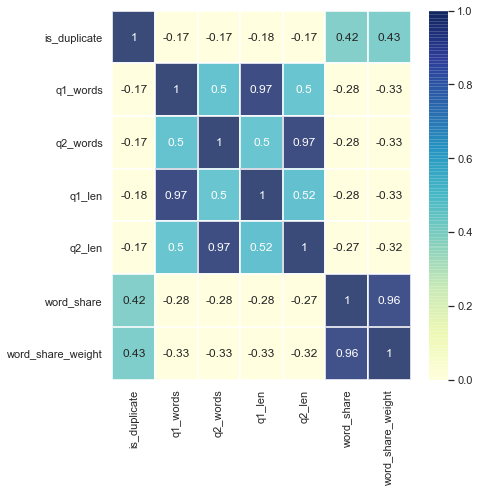

In [64]:
# Desenhe um mapa de calor com as correlações
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

sns.heatmap(df_train_over.drop(['question1', 'question2'], axis=1).corr(), annot=True, linewidths=1, ax=ax, cmap='YlGnBu',  vmin=0, vmax=1, alpha = 0.8)
plt.tight_layout()

### Dados de entrada

In [65]:
df_train_over.head(1)

,question1,question2,is_duplicate,q1_words,q2_words,q1_len,q2_len,word_share,word_share_weight
0,what step step guid invest share market india,what step step guid invest share market,0,8,7,45,39,0.923077,0.798524


In [66]:
%%time
from scipy.sparse import hstack

x_vec_q1 = vectorizer.transform(df_train_over_norm['question1'].values)
x_vec_q2 = vectorizer.transform(df_train_over['question2'].values)
features_eng = df_train_over.drop(['question1', 'question2', 'is_duplicate'], axis=1).values

# X = df_train_over_norm.values
# X = hstack([x_vec_q1, x_vec_q2])
X = hstack([features_eng, x_vec_q1, x_vec_q2])
y = df_train_over['is_duplicate'].values

print('x_vec_q1 {}'.format(x_vec_q1.shape))
print('x_vec_q2 {}'.format(x_vec_q2.shape))
print('features_eng {}'.format(features_eng.shape))
print()
print('Train {}'.format(X.shape))
print('Lable {}'.format(y.shape))

x_vec_q1 (510054, 57613)
x_vec_q2 (510054, 57613)
features_eng (510054, 6)

Train (510054, 115232)
Lable (510054,)
CPU times: user 10.9 s, sys: 321 ms, total: 11.3 s
Wall time: 11.3 s


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import xgboost as xgb

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=233)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# specify parameters via map
param = {'max_depth':4, 'eta':0.02, 'silent':0, 'objective':'binary:logistic', 'eval_metric':'logloss'}
num_round = 400
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=50, verbose_eval=10)
# bst = xgb.train(param, dtrain, num_round, verbose_eval=5)

[0]	train-logloss:0.604025	valid-logloss:0.60499
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[5]	train-logloss:0.530171	valid-logloss:0.532805
[10]	train-logloss:0.512726	valid-logloss:0.515842
[15]	train-logloss:0.501692	valid-logloss:0.505201
[20]	train-logloss:0.493534	valid-logloss:0.497323
[25]	train-logloss:0.487698	valid-logloss:0.491925
[30]	train-logloss:0.482138	valid-logloss:0.486825
[35]	train-logloss:0.477574	valid-logloss:0.482345
[40]	train-logloss:0.473553	valid-logloss:0.478775
[45]	train-logloss:0.468251	valid-logloss:0.47378
[50]	train-logloss:0.46507	valid-logloss:0.471317
[55]	train-logloss:0.462468	valid-logloss:0.468892
[60]	train-logloss:0.459871	valid-logloss:0.46657
[65]	train-logloss:0.457598	valid-logloss:0.464801
[70]	train-logloss:0.455004	valid-logloss:0.462572
[75]	train-logloss:0.452525	valid-logloss:0.460526
[80]	train-logloss:0.450248	valid-loglo

In [68]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.metrics import log_loss

# make prediction
y_preds = bst.predict(dvalid)
best_preds = np.asarray([np.argmax(line) for line in y_preds])
predictions = [round(value) for value in y_preds]
               
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy:", accuracy * 100.0)

print("Precision Score:", precision_score(y_valid, predictions, average='macro'))
print("Log Loss:", log_loss(y_valid, best_preds))

Accuracy: 80.72290101479054
Precision Score: 0.8099908238171298
Log Loss: 17.36744046665682


## Submission

In [69]:
# submission
df_test = pd.read_csv("input/test.csv")

In [70]:
df_test.shape

(2345796, 3)

### Pré-processamento

In [71]:
%%time
df_test.fillna('', inplace=True)

df_test['question1'] = df_test['question1'].map(lambda q: question_preprocessing(q))
df_test['question2'] = df_test['question2'].map(lambda q: question_preprocessing(q))

CPU times: user 10min 50s, sys: 5.94 s, total: 10min 56s
Wall time: 11min 32s


In [72]:
# %%time
# df_test['dist'] = df_test.apply(lambda x: euclidean_dist(x['question1'], x['question2']), axis=1)

In [73]:
%%time
df_test['q1_words'] = df_test.apply(lambda row: len(row['question1'].split(' ')), axis=1)
df_test['q2_words'] = df_test.apply(lambda row: len(row['question2'].split(' ')), axis=1)

CPU times: user 1min 36s, sys: 1.4 s, total: 1min 37s
Wall time: 1min 40s


In [74]:
%%time
df_test['q1_len'] = df_test.apply(lambda row: len(row['question1']), axis=1)
df_test['q2_len'] = df_test.apply(lambda row: len(row['question2']), axis=1)

CPU times: user 1min 31s, sys: 1.08 s, total: 1min 32s
Wall time: 1min 34s


In [75]:
%%time
df_test['word_share'] = df_test.apply(word_share, axis=1)

CPU times: user 1min 26s, sys: 870 ms, total: 1min 27s
Wall time: 1min 28s


In [76]:
%%time
df_test['word_share_weight'] = df_test.apply(word_share_weight, axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 2min 55s, sys: 2.4 s, total: 2min 58s
Wall time: 3min 3s


In [77]:
df_test.head()

,test_id,question1,question2,q1_words,q2_words,q1_len,q2_len,word_share,word_share_weight
0,0,how surfac pro compar ipad pro,why microsoft choos core core home surfac pro,6,8,30,45,0.333333,0.349978
1,1,hair transplant ag how much would cost,how much cost hair transplant requir,7,6,38,36,0.769231,0.841381
2,2,what best wai send monei china,what send monei china,6,4,30,21,0.800000,0.840460
3,3,which food emulsifi,what food fibr,3,3,19,14,0.333333,0.299672
4,4,how aberystwyth start read,how start read,4,3,26,14,0.857143,1.000000


In [87]:
df_test.shape

(2345796, 9)

In [78]:
# df_test_over_norm = Normalizer(norm='l1').fit_transform(df_test.drop(['question1', 'question2', 'test_id'], axis=1))

In [79]:
# df_test_norm = Normalizer(norm='l1').fit_transform(df_test.drop(['question1', 'question2','test_id', 'word_share'], axis=1))

In [80]:
# df_test_norm = pd.DataFrame(df_test_norm)
# df_test_norm['4'] = df_test['word_share'].values
# df_test_norm.head()

In [81]:
# %%time
# x_test_vec_q1 = vectorizer.transform(df_test['question1'].values)
# x_test_vec_q2 = vectorizer.transform(df_test['question2'].values)

# X_test = hstack((x_test_vec_q1, x_test_vec_q2))

# print('Test {}'.format(X.shape))

In [82]:
# X_test = df_test.drop(['question1', 'question2','test_id'], axis=1)
# X_test = df_test_norm.values

In [88]:
%%time

x_test_vec_q1 = vectorizer.transform(df_test['question1'].values)
x_test_vec_q2 = vectorizer.transform(df_test['question2'].values)
features_test_eng = df_test.drop(['question1', 'question2', 'test_id'], axis=1).values

X_test = hstack([features_test_eng, x_test_vec_q1, x_test_vec_q2])

print('x_test_vec_q1 {}'.format(x_test_vec_q1.shape))
print('x_test_vec_q2 {}'.format(x_test_vec_q2.shape))
print('features_test_eng {}'.format(features_test_eng.shape))
print()
print('Test {}'.format(X_test.shape))

x_test_vec_q1 (2345796, 57613)
x_test_vec_q2 (2345796, 57613)
features_test_eng (2345796, 6)

Test (2345796, 115232)
CPU times: user 55.6 s, sys: 4.22 s, total: 59.8 s
Wall time: 1min 2s


In [89]:
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('submission3.csv', index=False)

In [190]:
# xgb.plot_tree(bst, num_trees=0)
# plt.rcParams['figure.figsize'] = [500, 200]
# fig.set_size_inches(50, 50)
# plt.show()

graph_to_save = xgb.to_graphviz(bst, num_trees = 4)
graph_to_save.format = 'png'            
graph_to_save.render('tree_4_saved_3')

'tree_4_saved_3.png'

In [97]:
# xgb.plot_importance(bst, max_num_features=10)

In [154]:
feat_weight = bst.get_score(importance_type='weight')
feat_gain = bst.get_score(importance_type='gain')

In [155]:
from collections import OrderedDict

feat_weight_sort = OrderedDict(sorted(feat_weight.items(), key=lambda t: t[1]))
feat_gain_sort = OrderedDict(sorted(feat_gain.items(), key=lambda t: t[1]))

In [169]:
i = 0
k = []
values = []
for key, value in feat_weight_sort.items():
    i+=1  
    if(i > len(feat_weight.items())-10):
        print(key, value)
        k.append(key)
        values.append(value)

f55629 42
f0 55
f3 97
f2 98
f22603 101
f80216 105
f113055 131
f55442 163
f4 250
f5 343


In [170]:
k.reverse()
values.reverse()

In [182]:
def replace_feature(w):
    l = {
        'f0': 'q1_words',
        'f1': 'q2_words	',
        'f2': 'q1_len',
        'f3': 'q2_len',
        'f4': 'word_share',
        'f5': 'word_share_weight',
        }
    
    if w in l.keys():
        return l[w]
    else:
        return w

In [184]:
lables = [replace_feature(w) for w in k]
lables

['word_share_weight',
 'word_share',
 'f55442',
 'f113055',
 'f80216',
 'f22603',
 'q1_len',
 'q2_len',
 'q1_words',
 'f55629']

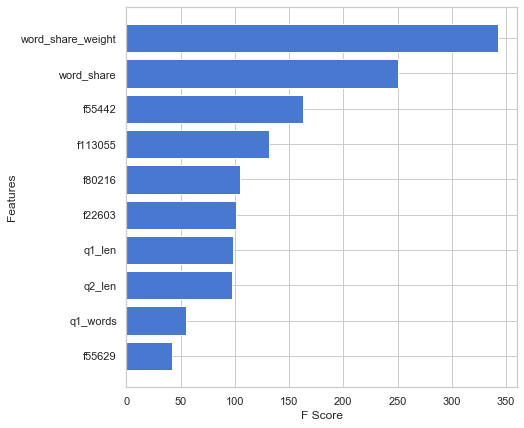

In [186]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

ax.barh(lables, values, align='center')
ax.set_yticks(lables)
ax.set_yticklabels(lables)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('F Score')
ax.set_ylabel('Features')

plt.show()